# **1- Importing Libraries**

In [ ]:
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# **2- Reading data**


In [ ]:
os.listdir()
df = pd.read_csv('/content/breast-cancer.csv')
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


# **3- Checking Missing and Duplicate Values**




In [ ]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
duplicates= df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst]
Index: []

[0 rows x 32 columns]


In [ ]:
numOfDuplicates = df.duplicated().sum()
print(f"Num of Duplicate Rows: {numOfDuplicates}")

Num of Duplicate Rows: 0


# **4- Converting categorical into Numerical**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
print(df['diagnosis'].unique())

['M' 'B']


In [ ]:
encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])
print(df['diagnosis'].unique())

[1 0]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# **5- Correlation and Distribution**

Correlation between radius mean and diagnosis: 0.7300285113754558



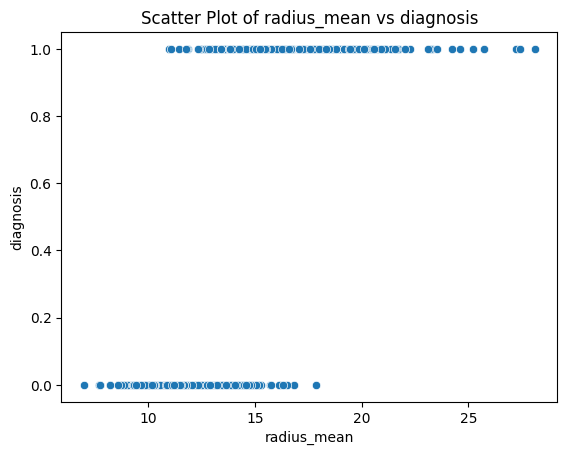


Correlation between texture mean and diagnosis: 0.4151852998452037



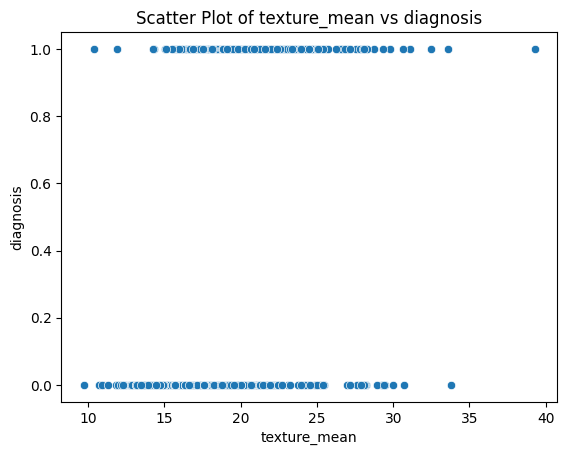

In [ ]:
correlation = df['radius_mean'].corr(df['diagnosis'])
print(f"Correlation between radius mean and diagnosis: {correlation}")
print("")
sns.scatterplot(x=df['radius_mean'], y=df['diagnosis'])
plt.title(f"Scatter Plot of radius_mean vs diagnosis")
plt.show()
print("")
correlation = df['texture_mean'].corr(df['diagnosis'])
print(f"Correlation between texture mean and diagnosis: {correlation}")
print("")
sns.scatterplot(x=df['texture_mean'], y=df['diagnosis'])
plt.title(f"Scatter Plot of texture_mean vs diagnosis")
plt.show()

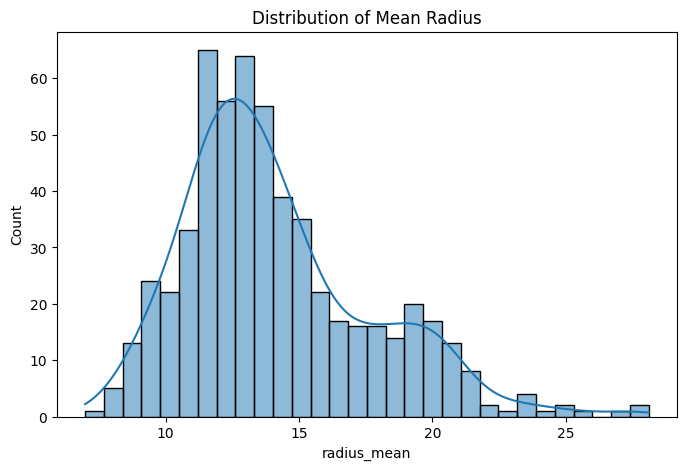

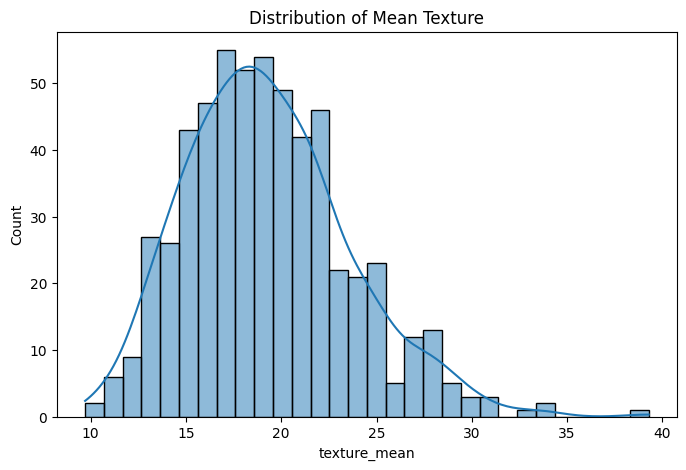

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['radius_mean'], bins=30, kde=True)
plt.title("Distribution of Mean Radius")
plt.show()
print("")
plt.figure(figsize=(8,5))
sns.histplot(df['texture_mean'], bins=30, kde=True)
plt.title("Distribution of Mean Texture")
plt.show()

# **6- Checking Outliers and Handling them**

In [ ]:
for column in df.select_dtypes(include=['number']):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column}: {outliers.shape[0]} outliers")

id: 81 outliers
diagnosis: 0 outliers
radius_mean: 14 outliers
texture_mean: 7 outliers
perimeter_mean: 13 outliers
area_mean: 25 outliers
smoothness_mean: 6 outliers
compactness_mean: 16 outliers
concavity_mean: 18 outliers
concave points_mean: 10 outliers
symmetry_mean: 15 outliers
fractal_dimension_mean: 15 outliers
radius_se: 38 outliers
texture_se: 20 outliers
perimeter_se: 38 outliers
area_se: 65 outliers
smoothness_se: 30 outliers
compactness_se: 28 outliers
concavity_se: 22 outliers
concave points_se: 19 outliers
symmetry_se: 27 outliers
fractal_dimension_se: 28 outliers
radius_worst: 17 outliers
texture_worst: 5 outliers
perimeter_worst: 15 outliers
area_worst: 35 outliers
smoothness_worst: 7 outliers
compactness_worst: 16 outliers
concavity_worst: 12 outliers
concave points_worst: 0 outliers
symmetry_worst: 23 outliers
fractal_dimension_worst: 24 outliers


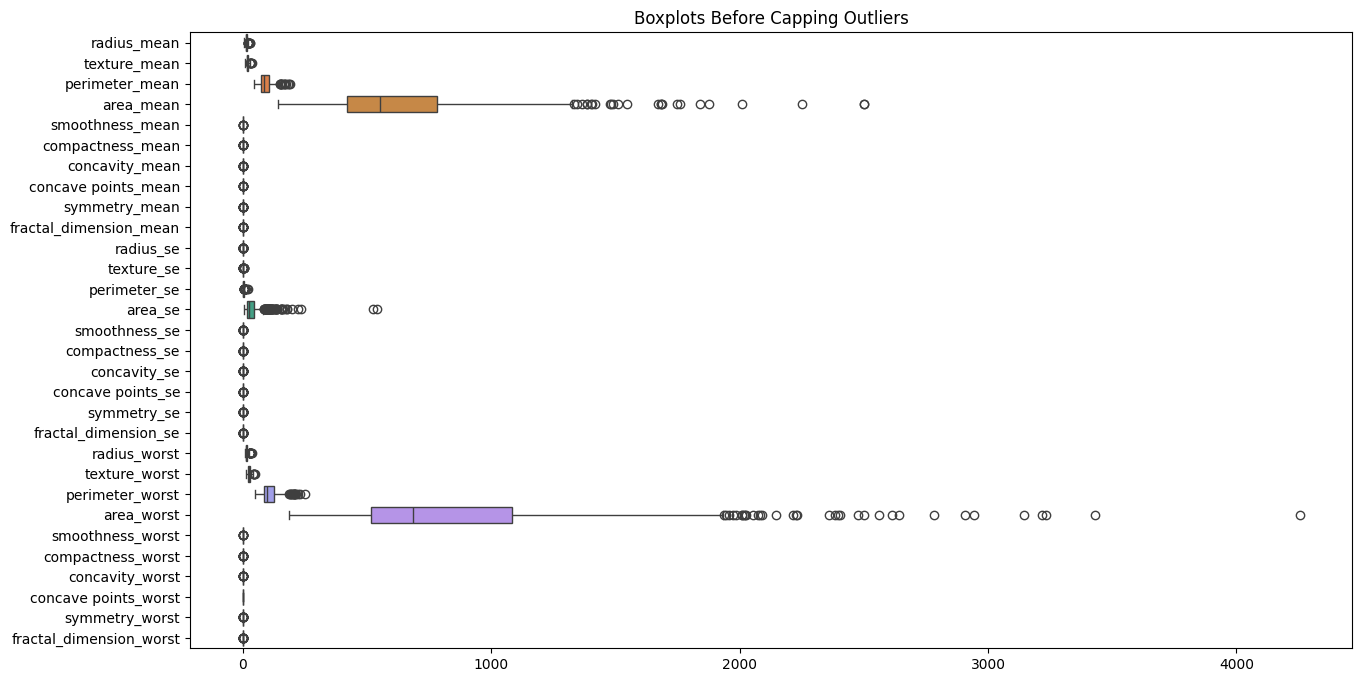

In [ ]:
ExecludeColumns = ['id', 'diagnosis']
ColumnsToCap = [col for col in df.select_dtypes(include=['number']).columns if col not in ExecludeColumns]
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[ColumnsToCap], orient="h")
plt.title("Boxplots Before Capping Outliers")
plt.show()

In [ ]:
ExcludeColumns = ['id', 'diagnosis']
ColumnsToCap = [col for col in df.select_dtypes(include=['number']).columns if col not in ExcludeColumns]
for column in ColumnsToCap:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

In [ ]:
for column in ColumnsToCap:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column}: {outliers.shape[0]} outliers")

radius_mean: 0 outliers
texture_mean: 0 outliers
perimeter_mean: 0 outliers
area_mean: 0 outliers
smoothness_mean: 0 outliers
compactness_mean: 0 outliers
concavity_mean: 0 outliers
concave points_mean: 0 outliers
symmetry_mean: 0 outliers
fractal_dimension_mean: 0 outliers
radius_se: 0 outliers
texture_se: 0 outliers
perimeter_se: 0 outliers
area_se: 0 outliers
smoothness_se: 0 outliers
compactness_se: 0 outliers
concavity_se: 0 outliers
concave points_se: 0 outliers
symmetry_se: 0 outliers
fractal_dimension_se: 0 outliers
radius_worst: 0 outliers
texture_worst: 0 outliers
perimeter_worst: 0 outliers
area_worst: 0 outliers
smoothness_worst: 0 outliers
compactness_worst: 0 outliers
concavity_worst: 0 outliers
concave points_worst: 0 outliers
symmetry_worst: 0 outliers
fractal_dimension_worst: 0 outliers


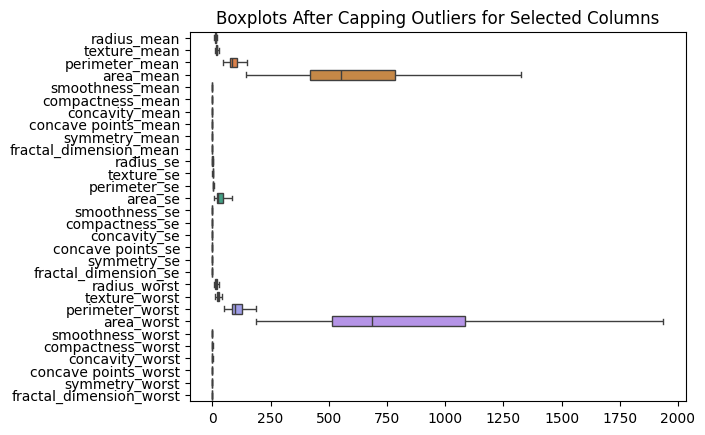

In [ ]:
sns.boxplot(data=df[ColumnsToCap], orient="h")
plt.title("Boxplots After Capping Outliers for Selected Columns")
plt.show()

# **7- Splitting data**

In [ ]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']
#80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (455, 31) (455,)
Testing set shape: (114, 31) (114,)


# **8- Applying Models and Evaluation**

**Decision Tree**

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9385964912280702
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



**Random Forest**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,...,25.38,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,...,14.91,26.50,98.87,567.70,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301
4,84358402,1,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678


In [ ]:
print(f"before converting: {df['diagnosis'].unique()} ")
df['diagnosis'] = encoder.inverse_transform(df['diagnosis'])
print(f"After {df['diagnosis'].unique()}")

before converting: [1 0] 
After ['M' 'B']


In [ ]:
df.to_csv("processed_data.csv", index=False)